In [ ]:
#CNN
import tensorflow as tf

In [ ]:
mnist=tf.keras.datasets.mnist
#Modified National Institute of Standards and Technology database
#It has a collection of greyscall images with handwritten digits
#from 0 to 9

In [ ]:
print(mnist)

<module 'keras.api._v2.keras.datasets.mnist' from '/usr/local/lib/python3.10/dist-packages/keras/api/_v2/keras/datasets/mnist/__init__.py'>


In [ ]:
(x_train,y_train),(x_test,y_test)=mnist.load_data()
x_train,x_test=x_train/255.0,x_test/255.0

11490434/11490434 [==============================] - 0s 0us/step


In [ ]:
model=tf.keras.models.Sequential([
    tf.keras.layers.Flatten()
])

In [ ]:
model=tf.keras.models.Sequential([
    tf.keras.layers.Flatten(input_shape=(28,28)),
    tf.keras.layers.Dense(128,activation='relu'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(10,activation='softmax')
])

In [ ]:
#x_train,x_test=x_train/255.0,x_test/255.0
# 1.)Why to divide by 255
#When we are working with image data,the pixel values are integers in the range of [0.255].So,dividing it by 255.0 scales these values to the range of [0,1]
# Working with the smaller values increase the stability of optimisation algorithm

 #tf.keras.layers.Dense(128,activation='relu')
 #2.Why 128
 #It is the specific number of neurons or units in the dense layer
 #relu -->Rectified linear Unit,It helps to add non-linerity to our alogorithm

In [ ]:
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

In [ ]:
model.fit(x_train,y_train,epochs=5)

Epoch 1/5
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0662 - accuracy: 0.9792
Epoch 2/5
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0601 - accuracy: 0.9807
Epoch 3/5
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0537 - accuracy: 0.9825
Epoch 4/5
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0485 - accuracy: 0.9841
Epoch 5/5
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0445 - accuracy: 0.9852


In [ ]:
test_loss,test_accuracy=model.evaluate(x_test,y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.0669 - accuracy: 0.9791


In [ ]:
print(test_loss)
print(test_accuracy)

0.06691929697990417
0.9790999889373779


In [ ]:
#---------->Activation function
#Relu
#It is on eof the most widely used activation function,It replaces all neagative values with zero,leaving the positivevalue unchanged

#Sigmoid
#sigmoid  reduces the output between o and 1,making it suitable for binary classification problems

#Tanh (Hyperbolic Tangent):
#It reduces the output between -1 to 1


#softmax
#It is mostly used in output layer

#Leaku ReLu
#It is an another varient of ReLu that allows a small positive pradient for negative value just to avoid dead neurons

In [ ]:
#Project:1
# Convert image to greyscall using CNN

import tensorflow as tf
from tensorflow.keras import layers,models
from tensorflow.keras.preprocessing.image import load_img,img_to_array
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
#Load the RGB image
image_path='/content/krishna.webp'
original_image=load_img(image_path,target_size=(224,224))
original_array=img_to_array(original_image)
print(original_array)

[[[ 10.  26.  84.]
  [  8.  24.  82.]
  [  5.  23.  81.]
  ...
  [ 18.  56. 145.]
  [ 17.  55. 144.]
  [ 19.  57. 147.]]

 [[ 10.  26.  84.]
  [  8.  24.  82.]
  [  5.  23.  81.]
  ...
  [ 19.  57. 147.]
  [ 18.  56. 145.]
  [ 20.  58. 148.]]

 [[ 10.  26.  84.]
  [  8.  24.  82.]
  [  5.  23.  81.]
  ...
  [ 19.  57. 147.]
  [ 19.  57. 147.]
  [ 19.  57. 147.]]

 ...

 [[  3.  19.  61.]
  [  4.  18.  59.]
  [  3.  17.  58.]
  ...
  [ 27.  62. 141.]
  [ 43.  78. 158.]
  [ 27.  61. 145.]]

 [[  3.  17.  58.]
  [  2.  16.  57.]
  [  1.  15.  55.]
  ...
  [ 23.  56. 133.]
  [ 30.  63. 140.]
  [ 30.  62. 144.]]

 [[  2.  16.  57.]
  [  1.  15.  55.]
  [  1.  15.  55.]
  ...
  [ 24.  57. 133.]
  [ 16.  49. 124.]
  [ 30.  62. 144.]]]


In [ ]:
original_array.shape

(224, 224, 3)

In [ ]:
#Load the RGB image
image_path='/content/krishna.webp'
original_image=load_img(image_path,target_size=(224,224))
original_array=img_to_array(original_image)/255.0
print(original_array)

[[[0.03921569 0.10196079 0.32941177]
  [0.03137255 0.09411765 0.32156864]
  [0.01960784 0.09019608 0.31764707]
  ...
  [0.07058824 0.21960784 0.5686275 ]
  [0.06666667 0.21568628 0.5647059 ]
  [0.07450981 0.22352941 0.5764706 ]]

 [[0.03921569 0.10196079 0.32941177]
  [0.03137255 0.09411765 0.32156864]
  [0.01960784 0.09019608 0.31764707]
  ...
  [0.07450981 0.22352941 0.5764706 ]
  [0.07058824 0.21960784 0.5686275 ]
  [0.07843138 0.22745098 0.5803922 ]]

 [[0.03921569 0.10196079 0.32941177]
  [0.03137255 0.09411765 0.32156864]
  [0.01960784 0.09019608 0.31764707]
  ...
  [0.07450981 0.22352941 0.5764706 ]
  [0.07450981 0.22352941 0.5764706 ]
  [0.07450981 0.22352941 0.5764706 ]]

 ...

 [[0.01176471 0.07450981 0.23921569]
  [0.01568628 0.07058824 0.23137255]
  [0.01176471 0.06666667 0.22745098]
  ...
  [0.10588235 0.24313726 0.5529412 ]
  [0.16862746 0.30588236 0.61960787]
  [0.10588235 0.23921569 0.5686275 ]]

 [[0.01176471 0.06666667 0.22745098]
  [0.00784314 0.0627451  0.22352941]


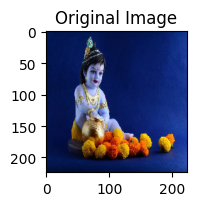

In [ ]:
plt.figure(figsize=(4,4))
plt.subplot(1,2,1)
plt.title("Original Image")
plt.imshow(original_array)

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 222, 222, 1)       28        
                                                                 
 max_pooling2d (MaxPooling2  (None, 111, 111, 1)       0         
 D)                                                              
                                                                 
Total params: 28 (112.00 Byte)
Trainable params: 28 (112.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
1/1 [==============================] - 0s 112ms/step


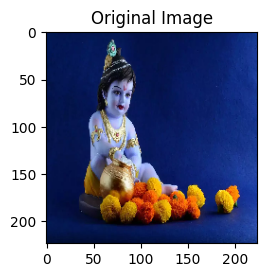

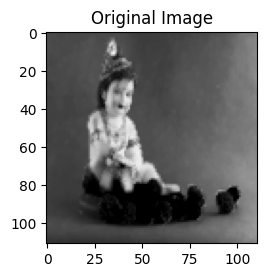

In [ ]:
#Covert image to grey scale
model=models.Sequential()
#Sequential() --> It allows us to create a linear stack of layers in a neural network.
#You can add one layer at neural network at a time and each layer has connection only to the previous and next layer
model.add(layers.Conv2D(1,(3,3),activation='relu',input_shape=(224,224,3)))
#Conved --> It represent 2D conventional layer

#Conentional layer --> used to perform element wise multiplication or division etc..
#layers.Con2BD --> 1 is used to mention the number of filters in the conventional layer(3,3)-->set the size of filter
#(224,224,3) --> 224*224 -->pixels with 3 color channel(RGB)
model.add(layers.MaxPooling2D((2,2)))
#MaxPolling2D() --> It is used to set the dimensions of input data and extract important features from Conv2d layer
model.summary()
#To reshape the image
input_image=np.expand_dims(original_array,axis=0)
greyscale=model.predict(input_image)

plt.figure(figsize=(6,6))
plt.subplot(1,2,1)
plt.title("Original Image")
plt.imshow(original_array)

plt.figure(figsize=(6,6))
plt.subplot(1,2,2)
plt.title("Original Image")
plt.imshow(np.squeeze(greyscale),cmap='gray')

In [1]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [2]:
#Project 2:
#Detect flowers based on images
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import style

#Model Selection
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import LabelEncoder

#preprocess
from keras.preprocessing.image import ImageDataGenerator

from keras import backend as K
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import Adam,SGD,Adagrad,Adadelta,RMSprop
from keras.utils import to_categorical

from keras.layers import Dropout,Flatten,Activation
from keras.layers import Conv2D,MaxPooling2D,BatchNormalization

import tensorflow as tf
import random as rn

import cv2
import numpy as np
from tqdm import tqdm
import os
from random import shuffle
from zipfile import ZipFile
from PIL import Image

In [3]:
X=[]
Z=[]
IMG_SIZE=150
FLOWER_DAISEY_DIR='/content/gdrive/MyDrive/archive (4)-20240219T092520Z-001/archive (4)/soc/train/daisy'
FLOWER_SUNFLOWER_DIR='/content/gdrive/MyDrive/archive (4)-20240219T092520Z-001/archive (4)/soc/train/sunflower'
FLOWER_TULIP_DIR='/content/gdrive/MyDrive/archive (4)-20240219T092520Z-001/archive (4)/soc/train/tulip'
FLOWER_DANDI_DIR='/content/gdrive/MyDrive/archive (4)-20240219T092520Z-001/archive (4)/soc/train/dandelion'
FLOWER_ROSE_DIR='/content/gdrive/MyDrive/archive (4)-20240219T092520Z-001/archive (4)/soc/train/rose'


In [6]:
def assign_label(ing,flower_type):
  return flower_type

In [9]:
#tqdm --> It creates a progress bar from the loop
def make_train_data(flower_type,DIR):
  for img in tqdm(os.listdir(DIR)):
#label=assign_label_label(img,flower_type)
    print(img)
make_train_data('Daisy',FLOWER_DAISEY_DIR)

100%|██████████| 501/501 [00:00<00:00, 60253.66it/s]

9204730092_a7f2182347.jpg
9321854387_5f77c926cb_n.jpg
9593034725_0062f0d24e_n.jpg
9299302012_958c70564c_n.jpg
9922116524_ab4a2533fe_n.jpg
9346508462_f0af3163f4.jpg
9529916092_de70623523_n.jpg
9345273630_af3550031d.jpg
9595857626_979c45e5bf_n.jpg
8709535323_a6bea3e43f.jpg
9054268881_19792c5203_n.jpg
8706810197_17b6c1f1e7.jpg
8938566373_d129e7af75.jpg
9161647994_e39b65cb9c_n.jpg
9120905231_329598304e.jpg
9242705328_eee8402a8d.jpg
8964198962_6d8593b533.jpg
9180706736_092d43088c.jpg
9515186037_3be48fe68f.jpg
9094631844_1a6abca29e.jpg
9611923744_013b29e4da_n.jpg
9350942387_5b1d043c26_n.jpg
8759177308_951790e00d_m.jpg
8708143485_38d084ac8c_n.jpg
9489270024_1b05f08492_m.jpg
9467543719_c4800becbb_m.jpg
9286947622_4822f4fc21.jpg
9244082319_b1f7e2d8b0_n.jpg
8983779970_9d3a6a3bf2_n.jpg
8718637649_87a0d85190_n.jpg
8645839873_0151fb92bf_n.jpg
8446495985_f72d851482.jpg
8619103877_d8c82c5f34_n.jpg
9310226774_d1b8f5d9c9.jpg
9496209717_25a6ebdab6_m.jpg
8709110478_60d12efcd4_n.jpg
8742143296_fed9fa007c.

In [19]:
def make_train_data(flower_type,DIR):
  for img in tqdm(os.listdir(DIR)):
    label=assign_label(img,flower_type)
    path=os.path.join(DIR,img)
    img=cv2.imread(path,cv2.IMREAD_COLOR)
    img=cv2.resize(img,(IMG_SIZE,IMG_SIZE))
    X.append(np.array(img))
    Z.append(str(label))

In [20]:
make_train_data('Daisy',FLOWER_DAISEY_DIR)
print(len(X))

100%|██████████| 501/501 [00:15<00:00, 31.63it/s]

501


In [21]:
make_train_data('Sunflower',FLOWER_SUNFLOWER_DIR)
print(len(X))

100%|██████████| 495/495 [00:12<00:00, 39.00it/s]

996


In [22]:
make_train_data('Tulip',FLOWER_TULIP_DIR)
print(len(X))

100%|██████████| 607/607 [00:17<00:00, 35.41it/s]

1603


In [23]:
make_train_data('Dandelion',FLOWER_DANDI_DIR)
print(len(X))

100%|██████████| 646/646 [00:18<00:00, 35.46it/s]

2249


In [24]:
make_train_data('Rose',FLOWER_ROSE_DIR)
print(len(X))


100%|██████████| 497/497 [00:15<00:00, 31.79it/s]

2746


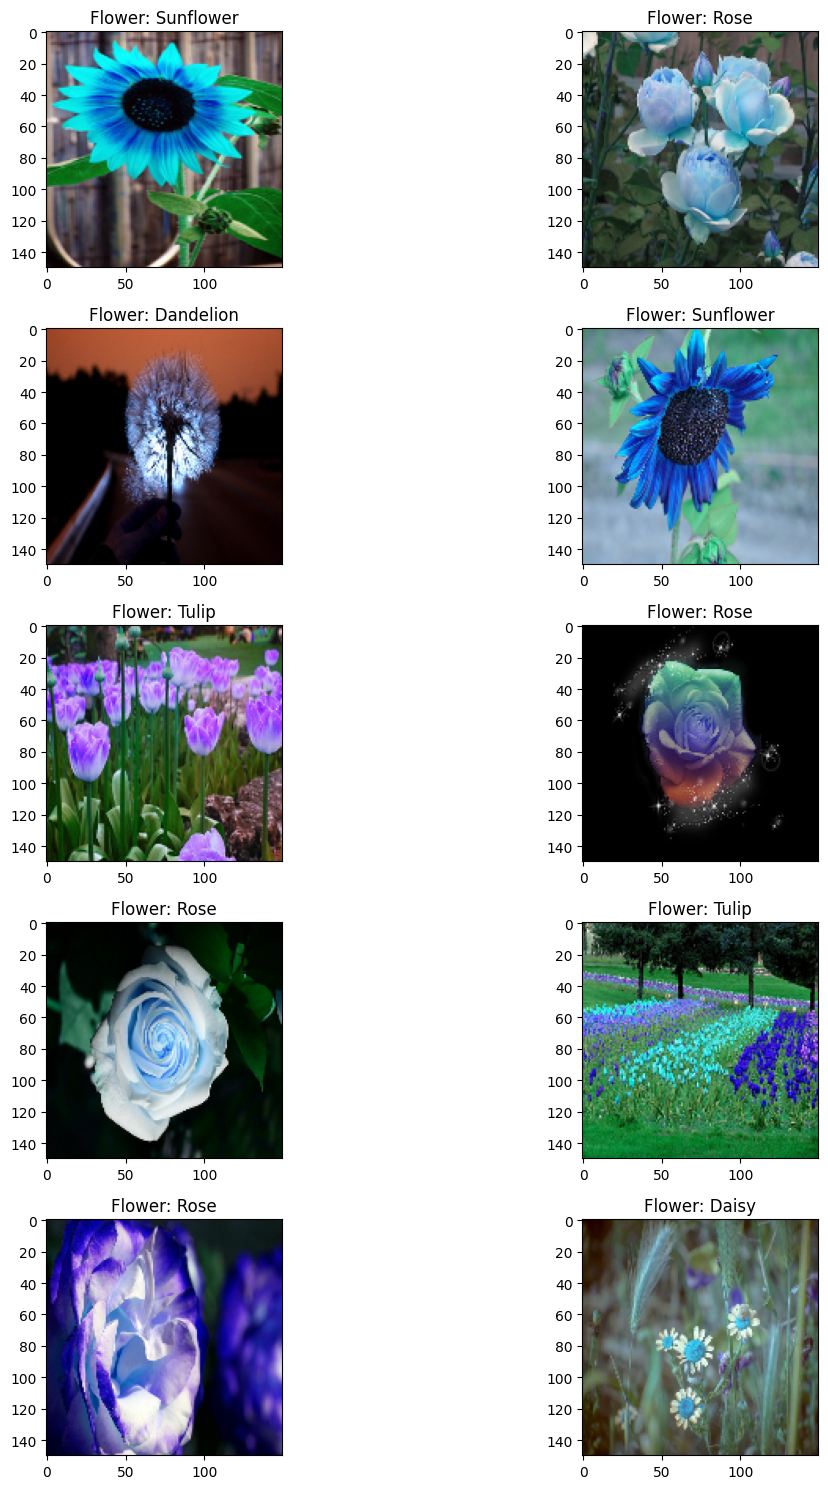

In [25]:
fig, ax = plt.subplots(5, 2)
fig.set_size_inches(15, 15)

for row in range(5):
  for col in range(2):
    l= rn.randint(0, len(Z))
    ax[row, col].imshow(X[l])
    ax[row, col].set_title("Flower: "+Z[l])

  plt.tight_layout()